In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.model_selection import GridSearchCV

In [2]:
%%time
df = pd.read_csv("../data/df_CatVal_cleanedV2.csv",
               encoding="utf-8", low_memory=False, index_col=0)

CPU times: total: 36 s
Wall time: 36 s


In [3]:
df.shape

(1833614, 144)

In [4]:
df.dropna(subset=['product_name'], inplace=True)

In [5]:
df_init = df

In [6]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
product_name  :  object
categories  :  object
serving_quantity  :  float64
additives_n  :  float64
nutriscore  :  float64
nutrigrade  :  int64
nova_group  :  float64
pnns1  :  object
ecoscore_score  :  float64
product_quantity  :  float64
unique_scans_n  :  float64
completeness  :  float64
energy-kj_100g  :  float64
energy-kcal_100g  :  float64
energy_100g  :  float64
energy-from-fat_100g  :  float64
fat_100g  :  float64
saturated-fat_100g  :  float64
butyric-acid_100g  :  float64
caproic-acid_100g  :  float64
caprylic-acid_100g  :  float64
capric-acid_100g  :  float64
lauric-acid_100g  :  float64
myristic-acid_100g  :  float64
palmitic-acid_100g  :  float64
stearic-acid_100g  :  float64
arachidic-acid_100g  :  float64
behenic-acid_100g  :  float64
lignoceric-acid_100g  :  float64
cerotic-acid_100g  :  float64
montanic-acid_100g  :  float64
melissic-acid_100g  :  float64
unsaturated-fat_100g  :  float64
monounsaturated-fat_100g  :  float64
polyunsaturated-fat_100g  :  f

In [7]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [8]:
index=0
for i in (df.loc[6]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

code : 0000000000100
product_name :  moutarde au moût de raisin 
categories : condiment , sauce , mustard , grocery
serving_quantity : 30.0
additives_n : 0.0
nutriscore : 18.0
nutrigrade : 3
nova_group : 4.0
pnns1 : fat and sauce
ecoscore_score : 54.0
product_quantity : 100.0
unique_scans_n : 1.0
completeness : 0.7625
energy-kj_100g : 936.0
energy-kcal_100g : 146.0
energy_100g : 936.0
energy-from-fat_100g : 126.0
fat_100g : 8.2
saturated-fat_100g : 2.2
butyric-acid_100g : 0.8
caproic-acid_100g : 0.09
caprylic-acid_100g : 1.0
capric-acid_100g : 0.9
lauric-acid_100g : 7.0
myristic-acid_100g : 2.0
palmitic-acid_100g : 25.5
stearic-acid_100g : 3.0
arachidic-acid_100g : 4e-05
behenic-acid_100g : 0.5
lignoceric-acid_100g : 0.0
cerotic-acid_100g : 8.0
montanic-acid_100g : 3.15
melissic-acid_100g : 27.0
unsaturated-fat_100g : 5.8
monounsaturated-fat_100g : 6.67
polyunsaturated-fat_100g : 10.0
omega-3-fat_100g : 2.32
alpha-linolenic-acid_100g : 0.8
eicosapentaenoic-acid_100g : 1.1
docosahexaeno

In [9]:
df['pnns1'] = pd.factorize(df['pnns1'])[0]

In [10]:
#df.drop(columns = ['quantity_num'], inplace=True)

### Normalisation

In [11]:
# Sélectionner les colonnes numériques
numeric_cols = list(df.select_dtypes(include=["float64","int64"]).columns)

In [12]:
# Créer un scaler MinMax
scaler = StandardScaler()

In [13]:
# Appliquer la normalisation aux colonnes numériques
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
# Sélectionner les colonnes numériques
cols_to_convert_int = list(df.select_dtypes(include=["int64"]).columns)
cols_to_convert_float = list(df.select_dtypes(include=["float64"]).columns)

# Changing format of object and float64 columns
df[cols_to_convert_int] = df[cols_to_convert_int].astype('int32')
df[cols_to_convert_float] = df[cols_to_convert_float].astype('float32')

### X et y

In [15]:
# Sélectionner les colonnes numériques
numeric_cols.remove('pnns1')
numeric_cols.remove('nutriscore')
numeric_cols.remove('unique_scans_n')
numeric_cols.remove('completeness')

In [16]:
X = df[numeric_cols]

In [17]:
y = df['product_name']

### Petite PCA

In [18]:
# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=20)
pca_df = pd.DataFrame(pca.fit_transform(df[numeric_cols]))

In [19]:
from sklearn.cluster import KMeans

k = 10
k_values = range(1, k+1)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

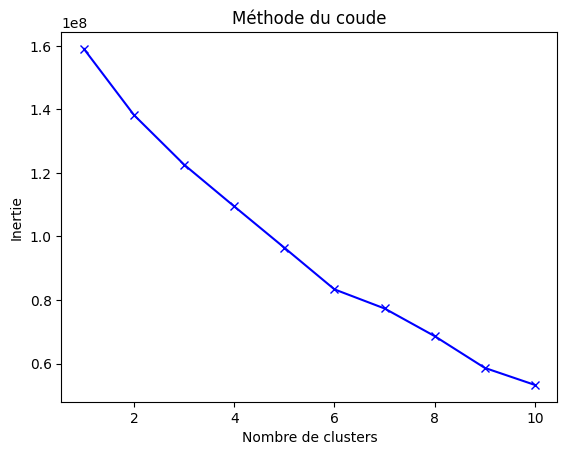

In [20]:
import matplotlib.pyplot as plt

plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("Méthode du coude")
plt.show()

In [21]:
# Sélectionner le nombre optimal de clusters
k = 11

## K-means avec PCA

In [22]:
# Appliquer K-means avec le nombre optimal de clusters (avec PCA)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11, random_state=42)

In [23]:
df['cluster_K_pca'] = kmeans.labels_

C:\Users\joell\AppData\Local\Temp\ipykernel_7404\4222455833.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster_K_pca'] = kmeans.labels_


In [24]:
kmeans.inertia_

49291300.0

In [25]:
adjusted_mutual_info_score(df['pnns1'],df['cluster_K_pca'])

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.9445927968120251

In [26]:
import joblib
# Enregistrer le modèle sur le disque
joblib.dump(kmeans, 'kmeans_pca.pkl')
# Charger le modèle sauvegardé depuis le disque
#kmeans = joblib.load('kmeans_pca.pkl')

['kmeans_pca.pkl']

Nuage de mots

In [27]:
import nltk
import collections as co
from io import StringIO
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Définition des stop words
stop_words = set(stopwords.words('english'))
stop_words_fr = set(stopwords.words('french'))
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_italian = set(stopwords.words('italian'))

stop_words |= stop_words_fr 
stop_words |= stop_words_spanish
stop_words |= stop_words_italian

stop_words.add('free')
stop_words.add('style')
stop_words.add('mini')
stop_words.add('bio')
stop_words.add('s')
stop_words.add('n')
stop_words.add('mit')

Cluster PCA

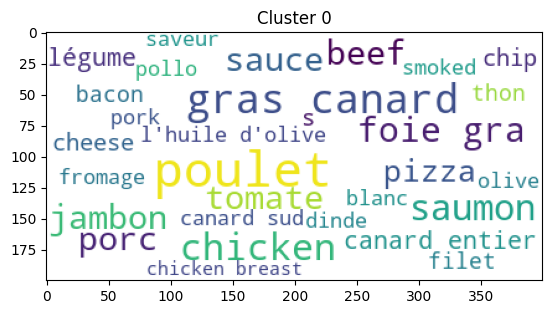

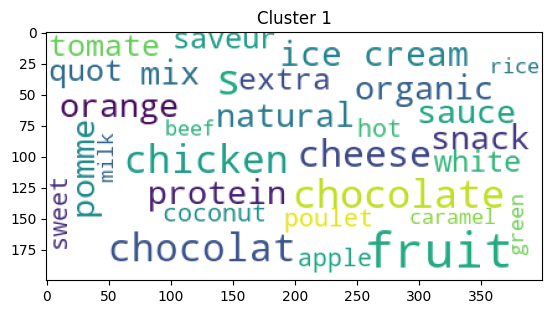

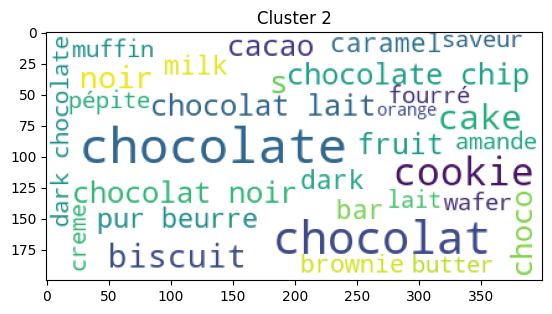

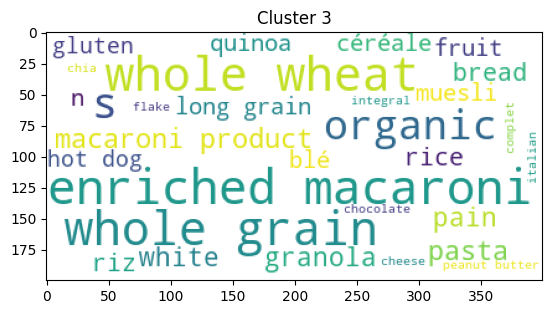

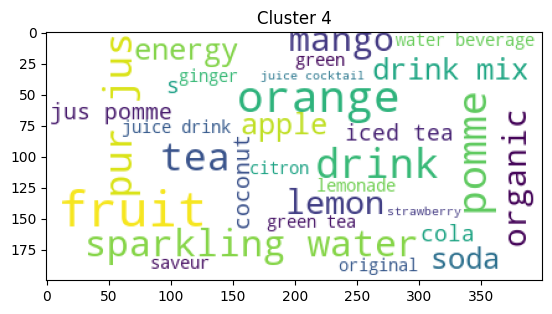

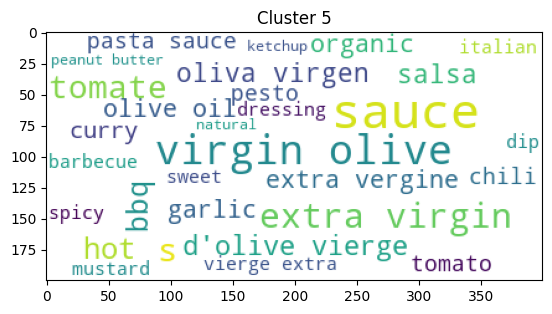

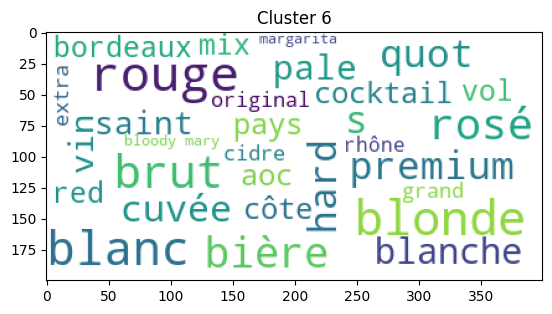

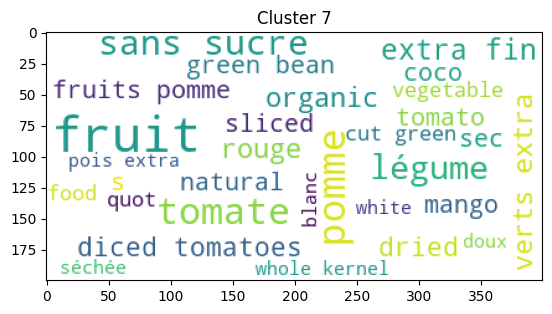

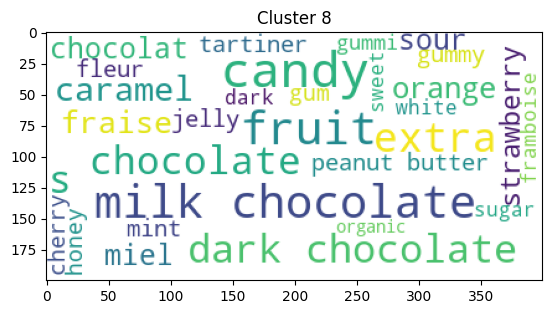

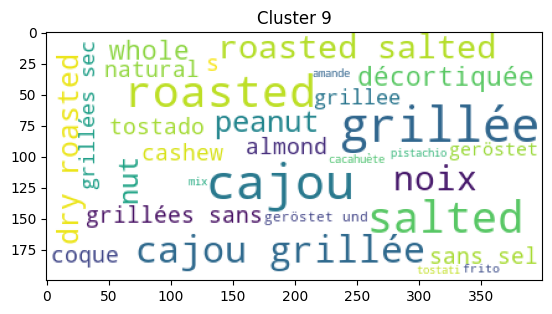

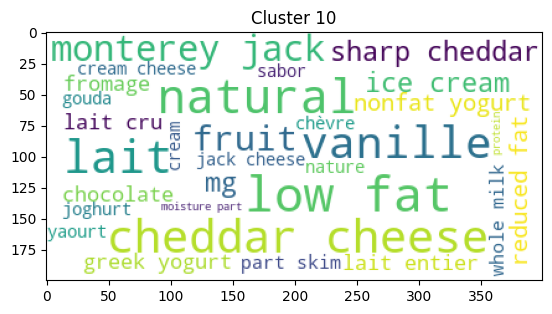

In [29]:
clusterPCA_0 = df['product_name'].where(df['cluster_K_pca'] == 0)
clusterPCA_1 = df['product_name'].where(df['cluster_K_pca'] == 1)
clusterPCA_2 = df['product_name'].where(df['cluster_K_pca'] == 2)
clusterPCA_3 = df['product_name'].where(df['cluster_K_pca'] == 3)
clusterPCA_4 = df['product_name'].where(df['cluster_K_pca'] == 4)
clusterPCA_5 = df['product_name'].where(df['cluster_K_pca'] == 5)
clusterPCA_6 = df['product_name'].where(df['cluster_K_pca'] == 6)
clusterPCA_7 = df['product_name'].where(df['cluster_K_pca'] == 7)
clusterPCA_8 = df['product_name'].where(df['cluster_K_pca'] == 8)
clusterPCA_9 = df['product_name'].where(df['cluster_K_pca'] == 9)
clusterPCA_10 = df['product_name'].where(df['cluster_K_pca'] == 10)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [clusterPCA_0, clusterPCA_1, clusterPCA_2, clusterPCA_3, clusterPCA_4,clusterPCA_5, clusterPCA_6, clusterPCA_7, clusterPCA_8, clusterPCA_9, clusterPCA_10]:

    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

Categories dans chaque cluster

In [30]:
def print_top_10(df, col):
    res = df[col].head(10)
    for el in res:
        print(f'    - {el}')

In [31]:
prd_names = df['product_name'].loc[df.index]
cats_name = df['categories'].loc[df.index]
df['cats'] = cats_name
df['names'] = prd_names 

C:\Users\joell\AppData\Local\Temp\ipykernel_7404\2691426148.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cats'] = cats_name
C:\Users\joell\AppData\Local\Temp\ipykernel_7404\2691426148.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['names'] = prd_names


In [32]:
for i in range(11):
    tmp_df = df[df['cluster_K_pca'] == i]
    tmp_df = tmp_df.sample(frac=1)
    print(f'Produit du cluster {i} :\n')
    print_top_10(tmp_df,'cats')
    print()

Produit du cluster 0 :

    - plant based food and beverage , plant based food , meat and their product , meat , meat alternative , meat analogue , vegetarian patty
    - meal
    - meat and their product , meat , poultry
    - seafood , fish , fatty fish , tuna , tropical tuna , yellowfin tuna
    - meal , prepared salad
    - meat and their product , meat , prepared meat
    - meat and their product , beef and it product , meat , beef , beef topside
    - meat and their product , meat , prepared meat
    - meat and their product , meat , chicken and it product , poultry , chicken , chicken thigh
    - seafood , snack , fish , salty snack , appetizer , meal , fish preparation , refrigerated food , refrigerated meal , cod acras , preparation made from fish meat

Produit du cluster 1 :

    - unknown
    - unknown
    - unknown
    - plant based food and beverage , plant based food , condiment , spice , cinnamon , cinnamon powder , grocery
    - unknown
    - unknown
    - unknown
    -

Produit du cluster 10 :

    - dairy , fermented food , fermented milk product , cheese
    - dairy , fermented food , fermented milk product , cheese , cow cheese , soft cheese with bloomy rind , french cheese , brie
    - dairy , dessert , dairy dessert , creamy pudding , canned creamy pudding , caramel creamy pudding
    - dairy , fermented food , fermented milk product , cheese , melted cheese
    - dairy , fermented food , fermented milk product , cheese , cow cheese
    - dairy , fermented food , fermented milk product , cheese
    - dairy , fermented food , dessert , fermented milk product , dairy dessert , fermented dairy dessert , petits suisse
    - dairy , milk , semi skimmed milk , skimmed milk
    - dairy , fermented food , fermented milk product , cheese , grated cheese
    - dairy , fermented food , fermented milk product , cheese , italian cheese , stretched curd cheese , mozzarella



### Kmeans 2 sans PCA

In [33]:
df2 = df.loc[:,[
'nutrigrade', 
'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
'sodium_100g', 'fiber_100g','fruits-vegetables-rate_100g',
'quantity_unit_0','quantity_unit_1','quantity_unit_2',
'pnns1_0','pnns1_1','pnns1_2','pnns1_3','pnns1_4','pnns1_5','pnns1_6','pnns1_7','pnns1_8','pnns1_9']]

In [34]:
# Appliquer K-means avec le nombre optimal de clusters (sans PCA)
kmeans2 = KMeans(n_clusters=k, random_state=42)
kmeans2.fit(df2)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11, random_state=42)

In [35]:
df['cluster_K_df2'] = kmeans2.labels_

C:\Users\joell\AppData\Local\Temp\ipykernel_7404\2943232237.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster_K_df2'] = kmeans2.labels_


In [36]:
kmeans2.inertia_

15200840.0

In [37]:
adjusted_mutual_info_score(df['pnns1'],df['cluster_K_df2'])

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.6730086549791499

In [38]:
# Enregistrer le modèle sur le disque
joblib.dump(kmeans2, 'kmeans2_col.pkl')
# Charger le modèle sauvegardé depuis le disque
#kmeans2 = joblib.load('kmeans2_col.pkl')

['kmeans2_col.pkl']

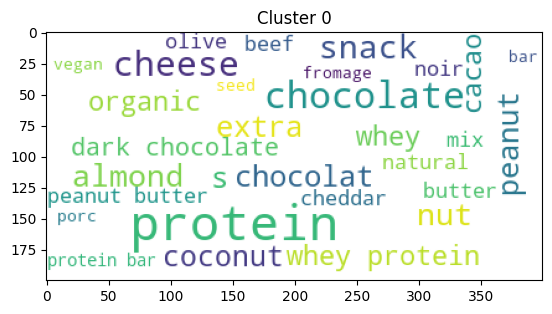

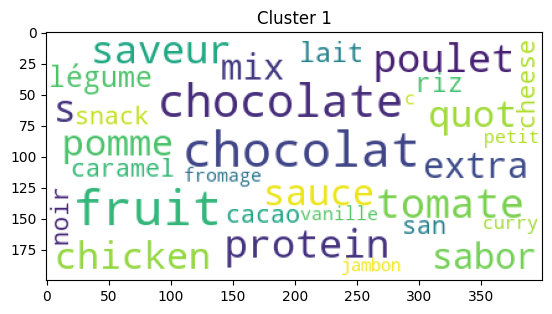

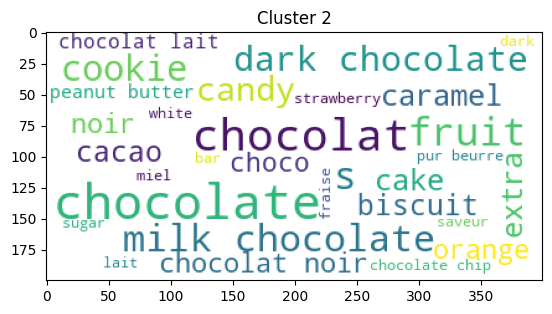

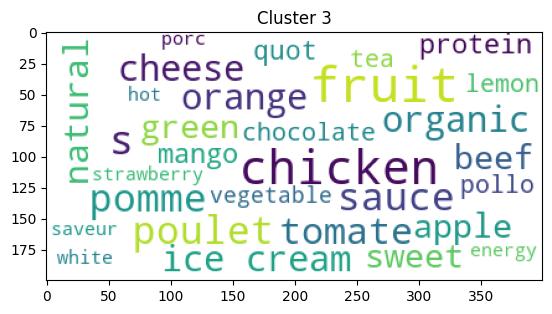

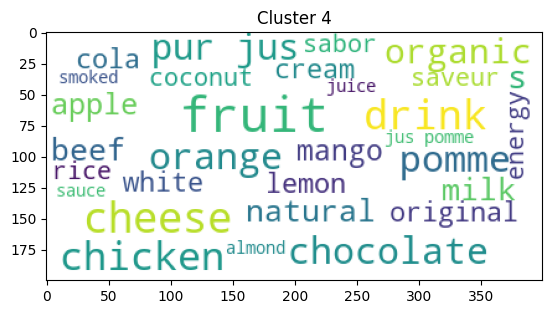

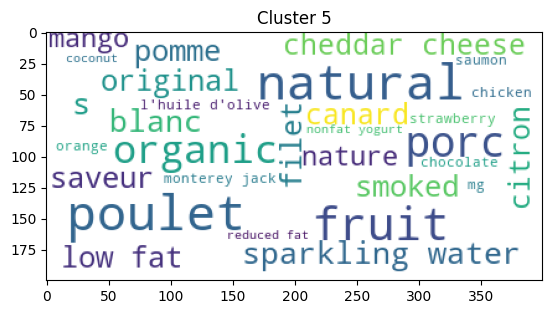

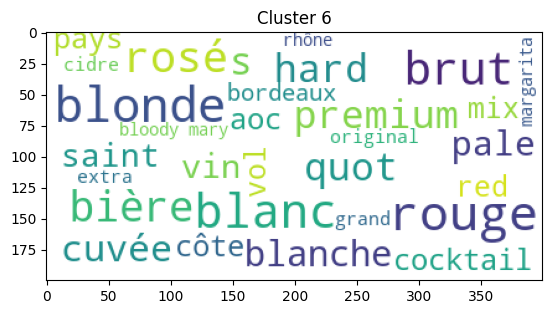

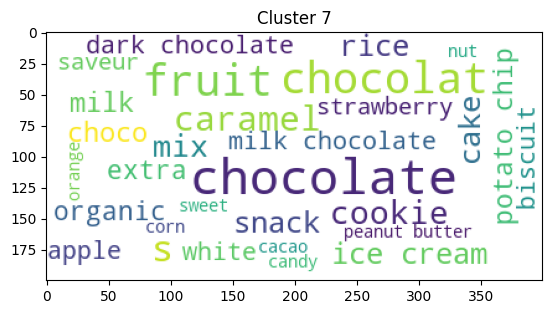

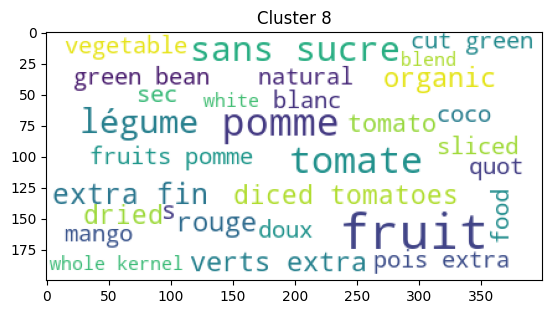

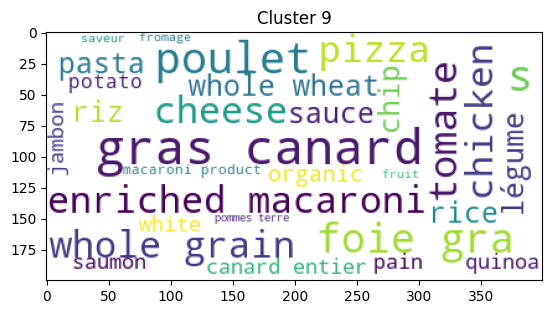

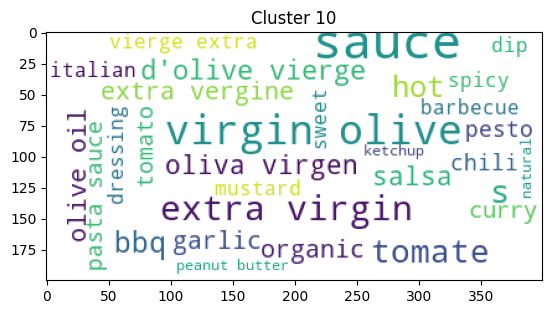

In [39]:
clusterK_0 = df['product_name'].where(df['cluster_K_df2'] == 0)
clusterK_1 = df['product_name'].where(df['cluster_K_df2'] == 1)
clusterK_2 = df['product_name'].where(df['cluster_K_df2'] == 2)
clusterK_3 = df['product_name'].where(df['cluster_K_df2'] == 3)
clusterK_4 = df['product_name'].where(df['cluster_K_df2'] == 4)
clusterK_5 = df['product_name'].where(df['cluster_K_df2'] == 5)
clusterK_6 = df['product_name'].where(df['cluster_K_df2'] == 6)
clusterK_7 = df['product_name'].where(df['cluster_K_df2'] == 7)
clusterK_8 = df['product_name'].where(df['cluster_K_df2'] == 8)
clusterK_9 = df['product_name'].where(df['cluster_K_df2'] == 9)
clusterK_10 = df['product_name'].where(df['cluster_K_df2'] == 10)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [clusterK_0, clusterK_1, clusterK_2, clusterK_3, clusterK_4,clusterK_5, clusterK_6, clusterK_7, clusterK_8, clusterK_9, clusterK_10]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

In [42]:
prd_names = df['product_name'].loc[df.index]
cats_name = df['categories'].loc[df.index]
df['cats'] = cats_name
df['names'] = prd_names 

In [41]:
for i in range(11):
    tmp_df = df[df['cluster_K_df2'] == i]
    tmp_df = tmp_df.sample(frac=1)
    print(f'Produit du cluster {i} :\n')
    print_top_10(tmp_df,'cats')
    print()

Produit du cluster 0 :

    - snack
    - unknown
    - plant based food and beverage , plant based food , legume and their product , spread , plant based spread , oilseed puree , legume butter , peanut butter
    - frozen food
    - unknown
    - unknown
    - unknown
    - unknown
    - unknown
    - unknown

Produit du cluster 1 :

    - unknown
    - dairy
    - frozen asian snack food
    - unknown
    - unknown
    - unknown
    - unknown
    - unknown
    - unknown
    - unknown

Produit du cluster 2 :

    - snack , sweet snack , biscuit and cake , cake , cooking helper , pastry helper , baking mix , dessert mix , cake mix
    - snack , sweet snack , confectionery
    - snack , sweet snack , viennoiseries , brioche
    - snack , sweet snack , cocoa and it product , chocolate
    - snack , sweet snack , confectionery , candy
    - snack , sweet snack , cocoa and it product , chocolate , milk chocolate
    - snack , sweet snack , biscuit and cake , biscuit , chocolate biscuit
   

Selection features

## AgglomerativeClustering

In [ ]:
#agglo = AgglomerativeClustering(n_clusters=3)
#agglo.fit(pca_df)

## DBSCAN

In [ ]:
%%time
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_df)

In [ ]:
df['cluster_D_pca'] = kmeans.labels_

In [ ]:
clusterPCA_DB0 = df['product_name'].where(df['cluster_D_pca'] == 0)
clusterPCA_DB1 = df['product_name'].where(df['cluster_D_pca'] == 1)
clusterPCA_DB2 = df['product_name'].where(df['cluster_D_pca'] == 2)
clusterPCA_DB3 = df['product_name'].where(df['cluster_D_pca'] == 3)
clusterPCA_DB4 = df['product_name'].where(df['cluster_D_pca'] == 4)
clusterPCA_DB5 = df['product_name'].where(df['cluster_D_pca'] == 5)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [clusterPCA_DB0, clusterPCA_DB1, clusterPCA_DB2,clusterPCA_DB3, clusterPCA_DB4, clusterPCA_DB5]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# Enregistrer le modèle sur le disque
joblib.dump(dbscan, 'dbscan_pca.pkl')
# Charger le modèle sauvegardé depuis le disque
dbscan = joblib.load('dbscan_pca.pkl')